In [6]:
import numpy as np
import utils

import matplotlib.pyplot as plt

from utils import process_dir, select_neutral, select_elev, plot_datas, qS

# tare1 = utils.tares.create_tare_from_dir('../wind_tunnel_data/2021-11-18/tare')

# data_10 = process_dir('../wind_tunnel_data/2021-11-18/as10',tare1)
# data_15 = process_dir('../wind_tunnel_data/2021-11-18/as15',tare1)
# data_20 = process_dir('../wind_tunnel_data/2021-11-18/as20',tare1)

import pickle
data_10 = pickle.load(open("data_18_10.pkl","rb"))
data_15 = pickle.load(open("data_18_15.pkl","rb"))
data_20 = pickle.load(open("data_18_20.pkl","rb"))

datas = [
    data_10,
    data_15,
    data_20,
    ]

speeds = [10,15,20,]
names = ('10','15','20')


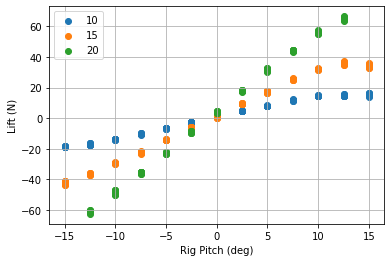

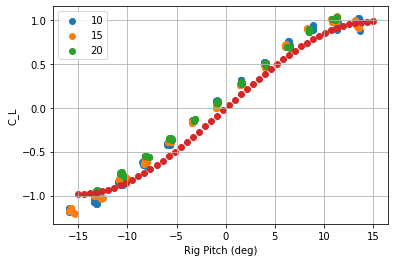

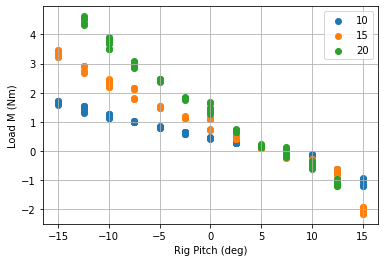

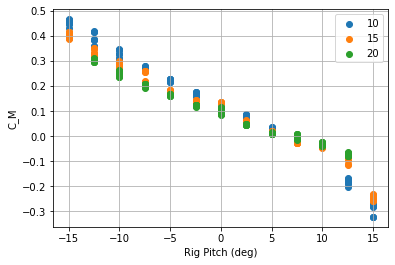

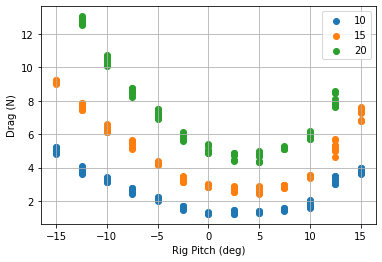

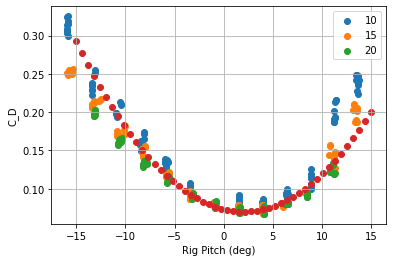

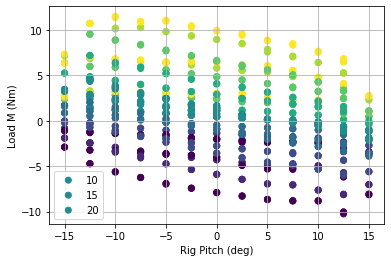

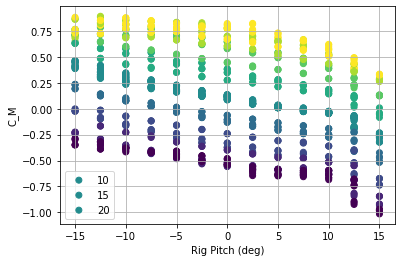

In [7]:

sel_datas = list(map(lambda d: select_neutral(d),datas))

# Lift
plot_datas(
    sel_datas,names,
    lambda d: d.rig_pitch,
    lambda d: d.lift,
    "Rig Pitch (deg)",
    "Lift (N)"
    )

plot_datas(
    sel_datas,names,
    lambda d,_: d.pitch,
    lambda d,a: d.lift / qS(a),
    "Rig Pitch (deg)",
    "C_L",
    fnargs=speeds
    )

alphas = np.linspace(-15,15)
def c_l(a):
    return -(1.0/6500.0)*a**3 + 0.1*a
plt.scatter(alphas,list(map(c_l,alphas)))

# Pitching Moment
plot_datas(
    sel_datas,names,
    lambda d: d.rig_pitch,
    lambda d: d.load_m,
    "Rig Pitch (deg)",
    "Load M (Nm)"
    )

plot_datas(
    sel_datas,names,
    lambda d,_: d.rig_pitch,
    lambda d,a: d.load_m / (qS(a) * 0.23),
    "Rig Pitch (deg)",
    "C_M",
    fnargs=speeds
    )

# Drag
plot_datas(
    sel_datas,names,
    lambda d: d.rig_pitch,
    lambda d: d.drag,
    "Rig Pitch (deg)",
    "Drag (N)"
    )

plot_datas(
    sel_datas,names,
    lambda d,_: d.pitch,
    lambda d,a: d.drag / qS(a),
    "Rig Pitch (deg)",
    "C_D",
    fnargs=speeds
    )

alphas = np.linspace(-15,15)
def c_d(a):
    return (1/1300.0)*(a-2)**2 + 0.07
plt.scatter(alphas,list(map(c_d,alphas)))

sel_datas = list(map(lambda d: select_elev(d),datas))

plot_datas(
    sel_datas,names,
    lambda d: d.rig_pitch,
    lambda d: d.load_m,
    "Rig Pitch (deg)",
    "Load M (Nm)",
    cfn=lambda d: d.elevator
    )

plot_datas(
    sel_datas,names,
    lambda d,_: d.rig_pitch,
    lambda d,a: d.load_m / (qS(a) * 0.23),
    "Rig Pitch (deg)",
    "C_M",
    cfn=lambda d,_: d.elevator,
    fnargs=speeds
    )


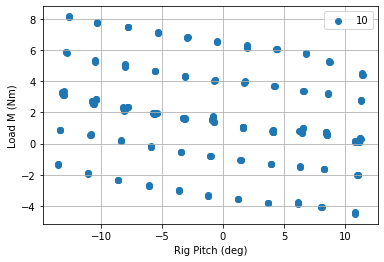

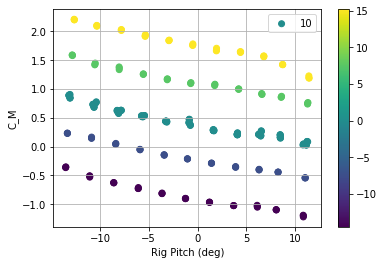

In [10]:
sel_datas = map(lambda d: select_elev(d,0.0,epsilon=20.0), datas)
sel_datas = map(lambda d: d[abs(d.throttle - 0.0) < 0.05], sel_datas)

from utils.clean import shift_data
sel_datas = list(map(lambda d: shift_data(d,[-0.02,0.0,0.0]),sel_datas))


# Pitching Moment
plot_datas(
    [sel_datas[2]],names,
    lambda d: d.pitch,
    lambda d: d.load_m,
    "Rig Pitch (deg)",
    "Load M (Nm)"
    )

plot_datas(
    [sel_datas[2]],names,
    lambda d,_: d.pitch,
    lambda d,a: d.load_m / (qS(a) * 0.23),
    "Rig Pitch (deg)",
    "C_M",
    cfn=lambda d,_: d.elevator,
    fnargs=speeds
    )
plt.colorbar()

In [9]:
# import pickle

# for data,name in zip(datas,names):
#     with open(f"data_18_{name}.pkl","wb") as f:
#         pickle.dump(data,f)